## Prueba #0401 (Solución)

### "Número óptimo de clústeres para agrupamiento con K-medias"

### "Optimal number of clusters for K-means clustering"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Responde la siguiente pregunta proporcionando código Python:

In [2]:
# Usaremos datos simulados.
# 3 grupos en un espacio de 8 dimensiones.
# ¡Difícil de visualizar!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Defina una función que calcule la "suma interna total de cuadrados".
- X         :   Datos.
- centers   :   Matriz que contiene las coordenadas del centroide. Calculado por kmeans.
- clusters  :   Amatriz de etiquetas de clústeres. Calculado por kmeans. <br> <br>
SUGERENCIA: Implemente la fórmula de la clase teórica.

In [3]:
def total_internal_ss(X, centers, clusters):
    N_clusters = centers.shape[0]
    N_columns = centers.shape[1]
    N_rows = X.shape[0]
    closest_centers = np.zeros((N_rows, N_columns))
    for n in range(N_clusters):
        indices = (clusters == n)
        for j in range(N_columns):
            closest_centers[indices,j] = centers[n,j]             # Este es el centro (centroide) más cercano a la observación dada.
    return np.sum((X-closest_centers)**2.0)

2). Visualice como un diagrama de dispersión la "suma interna total de cuadrados" vs N# de grupos. 
- Luego, determine el número óptimo de clústeres.
- ¿Es este número el mismo que se esperaba?

In [4]:
n_cluster = np.array(range(2,10))                   # Matriz que contiene el número de clústeres.
total_ss = np.array([])                             # Matriz que contendrá la suma interna total de cuadrados.
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_
    total_ss = np.append(total_ss, total_internal_ss(X,centers,clusters))

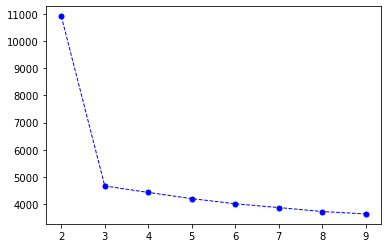

In [5]:
plt.plot(n_cluster,total_ss,color='blue',marker='o',linestyle='dashed',linewidth=1,markersize=5)
plt.show()